<a href="https://colab.research.google.com/github/andreidore/FSM/blob/master/prophet/stocks.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

https://towardsdatascience.com/time-series-forecasting-predicting-stock-prices-using-facebooks-prophet-model-9ee1657132b5

In [8]:
!pip install fbprophet

In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from fbprophet import Prophet

In [4]:
data=pd.read_csv("GOOG.csv")

In [5]:
data.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2015-06-08,533.309998,534.119995,526.239990,526.830017,526.830017,1520600
1,2015-06-09,527.559998,529.200012,523.010010,526.690002,526.690002,1455300
2,2015-06-10,529.359985,538.359985,529.349976,536.690002,536.690002,1815000
3,2015-06-11,538.424988,538.979980,533.020020,534.609985,534.609985,1217500
4,2015-06-12,531.599976,533.119995,530.159973,532.330017,532.330017,955800


In [6]:
data.describe()

,Open,High,Low,Close,Adj Close,Volume
count,1262.000000,1262.000000,1262.000000,1262.000000,1262.000000,1.262000e+03
mean,982.884677,991.980983,974.031114,983.451723,983.451723,1.723551e+06
std,231.644952,234.464420,229.580341,232.283568,232.283568,8.637905e+05
min,519.500000,522.734009,515.179993,516.830017,516.830017,3.475000e+05
25%,769.570007,774.500000,764.652511,769.252502,769.252502,1.212700e+06
50%,1020.130005,1034.104981,1008.305023,1021.044983,1021.044983,1.488950e+06
75%,1159.880005,1174.482544,1150.543488,1163.472442,1163.472442,1.964575e+06
max,1525.069946,1532.105957,1521.400024,1526.689941,1526.689941,1.116490e+07


In [7]:
data=data[["Date","Close"]]
data=data.rename(columns={"Date":"ds","Close":"y"})
data.head()

,ds,y
0,2015-06-08,526.830017
1,2015-06-09,526.690002
2,2015-06-10,536.690002
3,2015-06-11,534.609985
4,2015-06-12,532.330017


In [10]:
model=Prophet(daily_seasonality=True)
model.fit(data)

INFO:numexpr.utils:NumExpr defaulting to 2 threads.


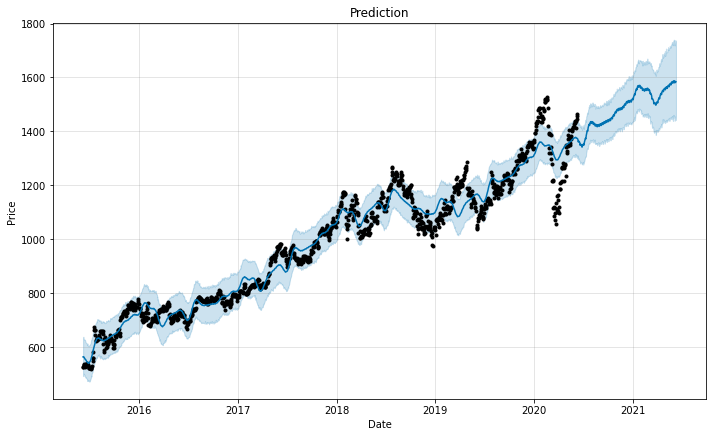

In [12]:
future=model.make_future_dataframe(periods=365)
prediction=model.predict(future)

model.plot(prediction)

plt.title("Prediction")
plt.xlabel("Date")
plt.ylabel("Price")
plt.show()

In [13]:
prediction.head()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,daily,daily_lower,daily_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2015-06-08,533.210809,497.473592,631.325290,533.210809,533.210809,30.365851,30.365851,30.365851,37.828814,37.828814,37.828814,0.634276,0.634276,0.634276,-8.097239,-8.097239,-8.097239,0.0,0.0,0.0,563.576660
1,2015-06-09,533.929793,491.886578,638.200863,533.929793,533.929793,30.085217,30.085217,30.085217,37.828814,37.828814,37.828814,1.738391,1.738391,1.738391,-9.481988,-9.481988,-9.481988,0.0,0.0,0.0,564.015010
2,2015-06-10,534.648778,501.655349,630.142707,534.648778,534.648778,29.327448,29.327448,29.327448,37.828814,37.828814,37.828814,2.539433,2.539433,2.539433,-11.040799,-11.040799,-11.040799,0.0,0.0,0.0,563.976226
3,2015-06-11,535.367763,495.526276,629.404182,535.367763,535.367763,27.450121,27.450121,27.450121,37.828814,37.828814,37.828814,2.388287,2.388287,2.388287,-12.766980,-12.766980,-12.766980,0.0,0.0,0.0,562.817883
4,2015-06-12,536.086748,499.164121,626.641223,536.086748,536.086748,25.335186,25.335186,25.335186,37.828814,37.828814,37.828814,2.156816,2.156816,2.156816,-14.650443,-14.650443,-14.650443,0.0,0.0,0.0,561.421934
